# K-Means Clustering Algorithim: Cancer Data sets

Washington State University  
By: Justin Pickel  
Date: 9/27/2019


#### Background: K-Means Clustering
One way to cluster objects is called k-means clustering. The goal is to find k different clusters, each represented by a centroid. The centroid is computed as follows: "the jth value in the centroid is the mean (average) of the jth values of all the members of the cluster" (Gina Sprint 2017). Our goal is to get every member assigned to the cluster it is closest to.

We start the algorithm with k initial clusters and centroids. We then alternate between two steps:

1. For each sample, find the nearest prototype. This assigns members to each cluster.

1. Set the prototype of each cluster as the centroid of its members.

We stop when the cluster assignment doesn't change(hitting convergence), or when we've reached a maximum number of iterations.

There are many ways to initialize K-means. We will use a random approach: for each sample, assign it to a randomly selected cluster.

Once members are assigned to a cluster, the cluster can set its centroid. Each iteration produces a new set of clusters, by assigning the samples according to the closest centroid. Closest is again just by Euclidean distance:

$$d(p,q) = d(q,p) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_i - p_i)^2} = \sqrt{\sum_{i=1}^{n}(q_i - p_i)^2}$$

where p and q are equal length vectors.

The process iterates until it reaches convergence, that is the membership of samples to clusters does not change from iteration to the next.


# Kmeans class

Next we will create the Kmeans class which will contain its constructor defined by 
```def __init__```
this will construct a Kmeans object used to store our clusters. The Kmeans object will have an attribute ```self.clusters``` which is an array used to store our clusters.

The Kmeans class takes an argument ```k``` which is the number of cluster we want to create.

```python 
class Kmeans:
    def __init__(self,k): # Kmeans constructor
        self.k = k
        self.clusters = []
        for i in range(k): # loop to create clusters.
            c = Cluster() # instantization of a cluster.
            self.clusters.append(c) #append the cluster to the Kmeans array "clusters".```

Since we are assigning our members based of the random approach discussed earlier. We will want to add a method to our Kmeans object to accomplish this. The method is called ```def Random(self,df)``` which takes a dataframe ```df``` as an argument. This method start by assigning a random sample to each cluster. This ensures no cluster is empty from the start, then the method assigns the remaining samples to a random cluster.

```python
    def Random(self,df):
            for j in self.clusters: # assigns a random sample to each cluster ensuring no cluster is empty.
                df_subset = df.sample(axis=0)
                index = df_subset.index
                df_list = list(df_subset.loc[index[0]])
                j.add_sample(df_list) # add the random sample to the cluster.
                df = df.drop(df_subset.index) # drop the randonly selected sample from the dataframe.
            ind = list(df.index)
            for i in ind: # for the rest of the samples assign them to a random cluster.
                rand_num = randrange(len(self.clusters)) # random number generator used to assign a specific cluster.
                self.clusters[rand_num].add_sample(list(df.loc[i])) # add the sample to the random cluster.
```

Since the K-Means algorithim compares the samples to each clusters centroid. We will need a method that can calculate the centroid for each cluster in our Kmeans object. This method is called ```def calc_centroid(self)``` this method takes no arguments, and calculates the mean of each feature in every sample. Then we assign the clusters ```centroid``` attribute to the centroid values calculated for each member in the cluster.

```python
    def calc_centroid(self):
        for i in self.clusters: # step through every cluster in the Kmeans cluster array.
            df = pd.DataFrame(i.members) # create a dataframe of the members in each cluster.
            centroid = df.mean() #use the created dataframe to calculate the mean of each feature.Turn that into a list.
            centroid = list(centroid.round(decimals=2))
            i.centroid = centroid # assign the clusters attribute "centroid" to the list of values generated.
```

Now that we have the clusters assigned members and a centroid assigned to each cluster. We can begin calculating the distance using the eulicidean formula discussed early. Once we know the distance from each sample to every clusters centroid we can then reassign that sample to the nearest clusters members array. This allows use to start finding distinct groups between the samples. We can accomplish this by invoking the method ```def dist(self,df)``` this method takes a dataframe ```df``` object as an argument. 

```python
    def dist(self,df):
        index = list(df.index)
        for j in index: # for every sample in the dataframe.
            vect2 = list(df.loc[j]) # assign that sample to a variable vect2.
            array = []
            for i in self.clusters: # step through each cluster in the Kmeans clusters array.
                if vect2 in i.members:
                    cluster = i # hold what cluster this sample came from.
                    pull = i.members.index(vect2) # hold the location of the sample within the cluster.
                vect1 = i.centroid # assign a variable vect1 to the current clusters centroid.
                sums = 0
                for k in range(len(vect2)): # loop through each value in the vect2 variable.
                    sums += (vect2[k]-vect1[k])**(2) #create a running total of all the diffrence values.
                dist = sqrt(sums) # take the square root of the running total this is your distance value.
                dist = round(dist,3)
                array.append(dist) # store that value in a array.
                print("Sample=",vect2)
                print("Centroid=",vect1)
                print("Distance =",dist)
                print("\n")
            push = array.index(min(array)) # the index value of the cluster that the sample should be reassigned to.
            cluster.remove_sample(pull) # remove the sample from its current cluster.
            self.clusters[push].add_sample(vect2) # add the sample to its newly assigned cluster.
```

The method ```def get_members(self)``` is a helpful method that allows us to grab all the current members for a Kmeans object. This method returns an array of all the members belonging to the Kmeans object.

```python
    def get_members(self):
        array = []
        for i in self.clusters:
            array.append(i.members) # append all member of that cluster.
        return array
```

Since we can grab all the members easily, it can be very helpful to grab all the current centroids of the Kmeans object. We can do this by invoking the ```def get_centroids(self)``` method. This method return an array of all the centroids accosiated to the Kmeans object.

```python
    def get_centroids(self):
        array = []
        for i in self.clusters:
            array.append(i.centroid) # append the centroids of each cluster to a array.
        return array
```

The last method we will need is a plot method conveniently named ```def plot(self)``` this method will generate a heatmap of all the members of a given Kmeans object. This allows us to visually see if any distinct clusters have formed.

```python
    def plot(self):
        total = []
        line = 0
        for i in range(len(self.clusters)):
            total.extend(self.clusters[i].members)
        frame1 = plt.subplot() # create a subplot.
        plt.pcolor(total, cmap="seismic") # create the heatmap using plt.pcolor color scale is seismic.
        frame1.axes.get_xaxis().set_visible(False) # remove labels from x axis.
        frame1.axes.get_yaxis().set_visible(False) # remove labels from y axis.
        for i in range(1,len(self.clusters)):
            line += len(self.clusters[-i].members)
            plt.axhline(y=line,c="Lime",lw=3.0)
        plt.colorbar() # create a colobar scale.
        plt.show()
```

After we have created our Kmeans class we start by creating a cluster class which is a sub class to the Kmeans and will contain a method known as the constructor defined by 
```def __init__```
this constructor takes no arguments and will construct a cluster object used to store our members(samples) and centroid values. The clusters object will have the attributes ```self.members``` which is an array used to store our members and ```self.centroid``` a place in memory to store our centroids that we will calculate after every iteration. Later we will add some methods we can use on our cluster objects.

```python
class Cluster(Kmeans):
    def __init__(self):
        self.members = []
        self.centroid = None
```

We will want the ability to add samples to a cluster. After all this is needed once we reassign new members to a cluster. When we invoke the method ```def add_sample(self,array)``` which takes a ```array``` as an argument the method will add the passed array to the clusters members attribute. 

```python
    def add_sample(self,array):
        self.members.append(array)
```

If we add a sample to a cluster we will more than likely want to remove a sample from a cluster. This is accomplished by calling the method ```def remove_sample(self,index)```. This method takes ```index``` as an argument this is a numerical value representing the index location within a clusters members array. For example if we have two samples(members) in a cluster and we want to remove the first sample in the members array we will pass 0 to ```remove_sample```. 

```python
    def remove_sample(self,index):
            self.members.pop(index)
```

Now that we have explained every piece of our Kmeans and Cluster class we can put this all together and start clustering data. We will first start with getting a sample plot working then we will use this algorithim to cluster a bigger data set.

<center>**Here is the entire Kmeans class including the Cluster sub class.**</center>

In [1]:
from math import*
from random import randrange
import matplotlib.pyplot as plt
# ########################################################################################
# Programmer: Justin Pickel
# Class: CptS 215 Fall 2019
# Programming Assignment #2
# 9/27/19
#
# Description: This program runs a Kmeans clustering algorithim to find a distinctive 
#              group of cluster patterns.
# ########################################################################################

class Kmeans:
    '''A class that creates a Kmeans object which is designed to allow various methods to be used on the object.
    def __init__: method used as the Kmeans Constructor which is called when you instantiate a Kmeans object.
    def Random: method used to assign samples to a random cluster.
    def cal_centroid: method used to calculate the centroids values.
    def dist: method used to calculate the disatance and reassignment to clusters based of Euclidean distance.
    def get_members: method used to retrieve the members of the Kmeans object.
    def get_centroids: method used to retrieve the centroids of the Kmeans object.
    def plot: method used to plot a heatmap of the data stored in the Kmeans object.
    Attribute k: a reference to the number of clusters stored in the Kmeans object.
    Attribute clusters: an array used to store the instantiated clusters.
    '''
    def __init__(self,k): # Kmeans constructor
        '''A method used to create the Kmeans object.
        Parameter k: a number used to define the amount of cluster to create.
        clusters are objects created from the clusters class.
        '''
        self.k = k
        self.clusters = []
        for i in range(k): # loop to create clusters.
            c = Cluster() # instantization of a cluster.
            self.clusters.append(c) #append the cluster to the Kmeans array "clusters".
            
    def Random(self,df):
        '''A method which assigns samples from the dataframe passed to random cluster objects
        Parameter df: a dataframe used to pull samples from.
        '''
        for j in self.clusters: # assigns a random sample to each cluster ensuring no cluster is empty.
            df_subset = df.sample(axis=0)
            index = df_subset.index
            df_list = list(df_subset.loc[index[0]])
            j.add_sample(df_list) # add the random sample to the cluster.
            df = df.drop(df_subset.index) # drop the randonly selected sample from the dataframe.
        ind = list(df.index)
        for i in ind: # for the rest of the samples assign them to a random cluster.
            rand_num = randrange(len(self.clusters)) # random number generator used to assign a specific cluster.
            self.clusters[rand_num].add_sample(list(df.loc[i])) # add the sample to the random cluster.
                 
    def calc_centroid(self):
        '''A method used to calulate the centroid of every cluster in the Kmeans array.
        This function takes the average of each feature from every member of a cluster and assigns that 
        array value to the clusters centroid attribute.
        '''
        for i in self.clusters: # step through every cluster in the Kmeans cluster array.
            df = pd.DataFrame(i.members) # create a dataframe of the members in each cluster.
            centroid = df.mean() # use the created dataframe to calculate the mean of each feature. Turn that into a list.
            centroid = list(centroid.round(decimals=2))
            i.centroid = centroid # assign the clusters attribute "centroid" to the list of values generated.

    def dist(self,df):
        '''A method that calculates the distance from each sample to every clusters centroid resulting in a numerical value
        of each cluster.
        Parameter df: a dataframe that has all of our samples we want to compare.
        '''
        index = list(df.index)
        for j in index: # for every sample in the dataframe.
            vect2 = list(df.loc[j]) # assign that sample to a variable vect2.
            array = []
            for i in self.clusters: # step through each cluster in the Kmeans clusters array.
                if vect2 in i.members:
                    cluster = i # hold what cluster this sample came from.
                    pull = i.members.index(vect2) # hold the location of the sample within the cluster.
                vect1 = i.centroid # assign a variable vect1 to the current clusters centroid.
                sums = 0
                for k in range(len(vect2)): # loop through each value in the vect2 variable.
                    sums += (vect2[k]-vect1[k])**(2) #create a running total of all the diffrence values between the centroid and the sample.
                dist = sqrt(sums) # take the square root of the running total this is your distance value.
                dist = round(dist,3)
                array.append(dist) # store that value in a array.
                if len(df) < 7:
                    print("Sample=",vect2)
                    print("Centroid=",vect1)
                    print("Distance =",dist)
                    print("\n")
            push = array.index(min(array)) # the index value of the cluster that the sample should be reassigned to.
            cluster.remove_sample(pull) # remove the sample from its current cluster.
            self.clusters[push].add_sample(vect2) # add the sample to its newly assigned cluster.
    
    def get_members(self):
        '''A method used to grab all the current members of the Kmeans clusters object.
        '''
        array = []
        for i in self.clusters:
            array.append(i.members) # append all member of that cluster.
        return array
    
    def get_centroids(self):
        '''A method used to retrieve all the centroids from the Kmeans clusters object.
        '''
        array = []
        for i in self.clusters:
            array.append(i.centroid) # append the centroids of each cluster to a array.
        return array
    
    def plot(self):
        '''A method used to plot a heatmap of the Kmeans clusters members.
        '''
        total = []
        line = 0
        for i in range(len(self.clusters)):
            total.extend(self.clusters[i].members)
        frame1 = plt.subplot() # create a subplot.
        plt.pcolor(total, cmap="seismic") # create the heatmap using plt.pcolor color scale is seismic.
        frame1.axes.get_xaxis().set_visible(False) # remove labels from x axis.
        frame1.axes.get_yaxis().set_visible(False) # remove labels from y axis.
        for i in range(1,len(self.clusters)):
            line += len(self.clusters[-i].members)
            plt.axhline(y=line,c="Lime",lw=3.0)
        plt.colorbar() # create a colobar scale.
        plt.show()
        
class Cluster(Kmeans):
    '''A class used to creat cluster objects which are inturn stored in a Kmeans object array.
    This class is a child class of Kmeans.
    def __init__: a method used as the class constructor.
    def add_sample: a method used to add samples to a cluster.
    def remove_sample: a method used to remove a sample from a cluster given its location within the cluster.
    Attribute members: an array containg all the samples assigned to that cluster.
    Attribute centroid: an array representing the clusters centroid.
    '''
    def __init__(self):
        '''The constructor for a cluster object.
        '''
        self.members = []
        self.centroid = None
    
    def add_sample(self,array):
        '''A method used to add samples to a cluster.
        Parameter array: A array used to represent the sample.
        '''
        self.members.append(array)
    
    def remove_sample(self,index):
        '''A method used to remove a sample from a cluster given its location within the cluster.
        Parameter index: the location of the sample to be removed.
        '''
        self.members.pop(index)

First thing we need to do is read in the data files. We will first read in the sample data ```sample.csv``` using the ```pandas ``` library. Once the file is read in it will convert it to a dataframe using ```pd.read_csv(filename)```

In [2]:
import pandas as pd

df = pd.read_csv('cancer_sample.csv',header=None,index_col=0)
print(df)

     1    2    3    4    5    6    7    8    9    10
0                                                   
g0  0.0  0.1  0.2  0.0  0.4  0.5  0.6  0.7  0.8  0.9
g1  1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.0  0.1
g2  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
g3  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
g4  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.0
g5  0.5  0.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5


Now we can instantiate a Kmeans object by assigning a varible to the ```Kmeans(k)``` command in this example we call our Kmeans object ```kmc``` and we will be passing a k value of ```3```.  
We will show the the current clusters by calling the kmeans object attribute ```kmc.clusters```

In [3]:
kmc = Kmeans(3) # creating a Kmeans object with 3 clusters
print(type(kmc)) # shows what type of object kmc is
kmc.clusters # shows current clusters objects that belong to our Kmeans object

<class '__main__.Kmeans'>


Since we will use the random approch to assigning clusters as mentioned above. We wil want to add a method to assign samples to random clusters. The code below accomplishes this by adding the ```def Random(self,df)``` this method takes an argument ```df``` which is a dataframe. So in this example we will call this method passing it the ```df``` dataframe we created above.

In [4]:
kmc.Random(df)
kmc.get_members() # shows the current members of all the clusters.

[[[0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
  [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]],
 [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]],
 [[0.0, 0.1, 0.2, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
  [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.0, 0.1],
  [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]]]

In [5]:
kmc.calc_centroid() # calculates centroid based off current members
kmc.get_centroids() # shows the current centroids for the Kmeans object after calculation

[[0.7, 0.4, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25],
 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 [0.47, 0.47, 0.47, 0.37, 0.47, 0.47, 0.47, 0.47, 0.4, 0.47]]

Now we can iterate the two steps discussed earlier  
1. For each sample, find the nearest prototype.

1. Set the prototype of each cluster as the centroid of its members.  

And once the algorithm converges or hits our max iteration we stop iterating.

In [6]:
flag=True # initiate the flag as True to execute the whil loop.
count = 0
while(flag): # iteration to calculate centroids and distances.
    kmc.calc_centroid()
    x = kmc.get_members() # grabing the members of all clusters before assignment.
    print("{:>50}Members Before".format(" "))
    print(x,"\n")
    kmc.dist(df)
    b = kmc.get_members() # grabs the members of the clusters after assignment.
    print("{:>50}Members After".format(" "))
    print(b)
    count += 1
    if x == b or count == 10: # stops the iteration once the members of the clusters do not change.
        flag = False

                                                  Members Before
[[[0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]], [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]], [[0.0, 0.1, 0.2, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.0, 0.1], [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]]] 

Sample= [0.0, 0.1, 0.2, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Centroid= [0.7, 0.4, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25]
Distance = 1.375


Sample= [0.0, 0.1, 0.2, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Centroid= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Distance = 0.5


Sample= [0.0, 0.1, 0.2, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Centroid= [0.47, 0.47, 0.47, 0.37, 0.47, 0.47, 0.47, 0.47, 0.4, 0.47]
Distance = 0.994


Sample= [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.0, 0.1]
Centroid= [0.7, 0.4, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25]
Distance = 0.728


Sample= [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4,

Now we can plot our results and see if we have distinct clusters. It is important to note we will not always have the members converge to the same cluster every time. This is in part because K-Means is suseptible to outliers from inital cluster.

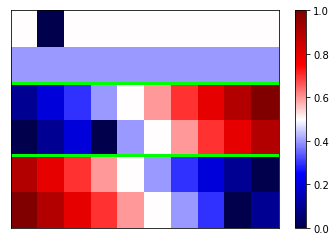

In [7]:
kmc.plot() # plot the heatmap of the end results.

Now Lets really crunch some data. We will begin by reading in the data from our big dataset file called ```cancer_big.csv```.

In [8]:
df2 = pd.read_csv("cancer_big.csv",header=None,index_col=0) # dataframe representing the file passed to it.

Now lets create a Kmeans object and pass it k=```2``` to create a Kmeans object with two clusters.

In [18]:
kmc = Kmeans(2) # instantiation of the Kmeans object .

Lets assign our members to random clusters.

In [19]:
kmc.Random(df2) # assigning samples to random clusters.

Iterate through until we hit convergence or max iteration is met.

In [20]:
flag=True # initiate the flag as True to execute the whil loop.
count = 0
while(flag): # iteration to calculate centroids and distances.
    kmc.calc_centroid()
    x = kmc.get_members() # grabing the members of all clusters before assignment.
    kmc.dist(df2)
    b = kmc.get_members() # grabs the members of the clusters after assignment.
    count += 1
    if x == b or count == 10: # stops the iteration once the members of the clusters do not change.
        flag = False

Now lets see some clusters!!!

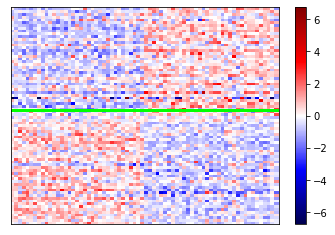

In [21]:
kmc.plot() # plot the heatmap of the end results.

# Conclusion

The dataset is partitioned into K clusters and the data points are randomly assigned to the clusters resulting in clusters that have roughly the same number of data points

The dataset is divided into K clusters and the data points are assigned to clusters randomly resulting in clusters having diffrent number of dta points upon intilization.

for each data point we:  
1. Calculate the distance from the data point to each cluster.  
1. If the data point is closest to  its own cluster, leave  it where  it is.  If  the data  point  is  not closest  to  its  own  cluster,  move  it  into  the closest cluster.  
1. Repeat until no data points move clusters

The following information was found on pg 95-96 at [Kmeans Comparison](https://www.researchgate.net/publication/293061584_Comparative_Study_of_K-Means_and_Hierarchical_Clustering_Techniques)  

Kaushik, Manju & Mathur, Bhawana. (2014). Comparative Study of K-Means and Hierarchical Clustering Techniques. Internatioonal journal of Software and Hardware Research in Engineering. 2. 93-98. 

### Strengths
* Simple:  -  Easy  to  understand  and  to implement.  
* Efficient:  Time  complexity:  O(tkn), where  n is the number of data points,   k is the number  of clusters,  and t  is  the  number  of iterations.

### Weakness
* The user needs to specify k.  
* The algorithm is sensitive to outliers 
* Outliers  could  be  errors  in  the  data recording  or some  special data  points  with very different values. 